<div style="background-color:lightgray; color:black; padding:10px; border-radius:5px;">
  <h1>Sprint 6</h1>
</div>

## Tarea 6: Pre procesado y transformación de datos

## 🎯 **Objetivo:**
Preparar los datos para entrenar a un modelo.

---

### **Ejercicio 1**. Preparación de datos.

# Introducción

El análisis exploratorio de datos (EDA) llevado a cabo anteriormente proporcionó una visión detallada de las características del conjunto de datos, revelando patrones y necesidades específicas de preprocesamiento para optimizar su uso en modelos predictivos. A continuación, se destacan los principales hallazgos del EDA y las estrategias propuestas para cada uno:

1. **Distribución de Variables Numéricas**: Las variables numéricas presentaron asimetrías y altos niveles de curtosis, con sesgos tanto hacia la izquierda como hacia la derecha. La mayoría de estas variables no sigue una distribución normal, según los resultados de las pruebas de normalidad, lo cual sugiere la necesidad de aplicar transformaciones específicas para normalizar estas distribuciones. Además, los Q-Q plots y boxplots indicaron la presencia de outliers en variables como `balance`, `duration`, `campaign`, `pdays` y `previous`.

2. **Outliers en Variables Numéricas**: Se identificaron outliers significativos en variables como `balance`, `duration` y `previous`, los cuales pueden afectar el rendimiento del modelo. Para reducir el impacto de estos valores extremos sin eliminarlos, se propone el uso de **winsorización** en `balance` y `previous`. Además, se sugiere aplicar transformaciones logarítmicas o de raíz cuadrada en variables como `balance`, `duration`, `campaign` y `pdays` para mitigar el sesgo y normalizar sus distribuciones.

3. **Imputación de Valores Faltantes**: Los valores nulos detectados en variables como `age`, `marital` y `education` requieren imputación:
   - **Variables Numéricas**: Para `age`, se sugiere la imputación con la mediana, dado que la distribución es sesgada y presenta valores extremos.
   - **Variables Categóricas**: En `marital` y `education`, la imputación se realizará con la categoría "Desconocido" para mantener la coherencia sin introducir sesgos adicionales.

4. **Escalado de Variables**: Considerando las diferentes escalas y la presencia de outliers en algunas variables numéricas, se implementarán dos métodos de escalado:
   - **RobustScaler**: Este escalado es apropiado para variables con outliers, como `balance`, `duration` y `pdays`.
   - **MinMaxScaler**: Para variables sin outliers significativos, como `age`, `campaign`, y `previous`, se usará MinMaxScaler para ajustar sus valores a un rango entre 0 y 1.

5. **Codificación de Variables Categóricas**: Para poder incluir las variables categóricas en modelos predictivos, se transformarán mediante **One-Hot Encoding**. Esto aplicará a las variables `marital`, `education`, `default`, `housing`, `loan`, `month`, `poutcome`, `contact`, y `job`, evitando así relaciones implícitas entre categorías.

## 1. Importar Librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carga el dataset

In [2]:
bank_data= pd.read_csv('/home/ngonzalez/mi_pagina_personal/bank_dataset.CSV')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# 3. Informació general del dataset

In [3]:
# Exploración inicial del DataFrame
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


El método data.info() nos proporciona un resumen general del conjunto de datos:

- Total de entradas: 11,162 registros con 17 columnas.
Tipos de datos:
- Variables numéricas (de tipo float64 y int64): como age, balance, day, duration, campaign, pdays, previous.
- Variables categóricas (object): job, marital, education, default, housing, loan, contact, month, poutcome, y deposit.
- Valores faltantes:age, marital, y education tienen algunos valores faltantes, ya manejados previamente en el análisis.

Este resumen nos confirma que las variables están bien definidas para el análisis exploratorio y el modelado posterior, permitiendo un análisis demográfico, financiero y de interacción de los clientes en relación con la suscripción de depósitos.

# 4. Análisis descriptivo:

Realizar un análisis descriptivo específico para variables numéricas y categóricas, esto ayudará a identificar posibles valores nulos, distribuciones y outliers.

In [4]:
# Análisis descriptivo para variables numéricas
num_features = bank_data.select_dtypes(include=['float64', 'int64'])
print(num_features.describe())

                age       balance           day      duration      campaign  \
count  11152.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.235384   1528.538524     15.658036    371.993818      2.508421   
std       11.914934   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


**Observación:**

Se confirman las variables númericas, de acuerdo al estudio previo: age, balance, day, duration, campaign, pdays, previous. 

In [5]:
# Revisar las variables categóricas
categorical_cols = bank_data.select_dtypes(include='object').columns
print("\nColumnas categóricas identificadas:", list(categorical_cols))


Columnas categóricas identificadas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [6]:
# Verificar frecuencias de cada variable categórica
print("\nFrecuencias de las categorías en las variables categóricas:")
for col in categorical_cols:
    print(f"\nFrecuencias de '{col}':")
    print(bank_data[col].value_counts())


Frecuencias de las categorías en las variables categóricas:

Frecuencias de 'job':
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

Frecuencias de 'marital':
married     6349
single      3517
divorced    1291
Name: marital, dtype: int64

Frecuencias de 'education':
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: education, dtype: int64

Frecuencias de 'default':
no     10994
yes      168
Name: default, dtype: int64

Frecuencias de 'housing':
no     5881
yes    5281
Name: housing, dtype: int64

Frecuencias de 'loan':
no     9702
yes    1460
Name: loan, dtype: int64

Frecuencias de 'contact':
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

Frecuencias de 'month':
may    2824
aug    1519


In [7]:
# Mostrar resumen de valores únicos por cada variable categórica
print("\n# --- Resumen de categorías únicas por variable categórica --- #")
print(bank_data[categorical_cols].nunique())


# --- Resumen de categorías únicas por variable categórica --- #
job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
deposit       2
dtype: int64


**Observaciones:**

De acuerdo al estudio previo:
* **Potencialmente Ordinales:** 
    - education:  (primary < secondary < tertiary). 
    - month (orden temporal: jan < feb < ... < dec).
* **Nominales:** job, marital, default, housing, loan, contact, poutcome, deposit.
* **Frecuencias:**
    - Varias variables como job, poutcome, y contact contienen categorías como "unknown" que podrían necesitar tratamiento especial.
    - education tiene 4 categorías (primary, secondary, tertiary, unknown).
    - month tiene 12 categorías, con un orden natural (meses del año).

# 5. Dividir los Datos en Entrenamiento y Prueba:

Dividir los datos permite evaluar el rendimiento del modelo en datos no vistos, lo cual es esencial para verificar su capacidad de generalización. Se asumió el 80% entrenamiento y 20% prueba.

In [8]:
# Separar características (X) y variable objetivo (y)
X = bank_data.drop(columns=['deposit'])  # Asumiendo que 'deposit' es la variable objetivo
y = bank_data['deposit']

# Dividir los datos con estratificación según la variable objetivo 'deposit'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Verificar la distribución de la variable objetivo en los conjuntos
print("# --- Verificación de Estratificación --- #")
print("Distribución en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

# --- Verificación de Estratificación --- #
Distribución en el conjunto de entrenamiento:
no     0.526151
yes    0.473849
Name: deposit, dtype: float64

Distribución en el conjunto de prueba:
no     0.526198
yes    0.473802
Name: deposit, dtype: float64


In [10]:
# Codificar y_train y y_test en valores numéricos
y_train = y_train.replace({'yes': 1, 'no': 0})
y_test = y_test.replace({'yes': 1, 'no': 0})

# Confirmar la codificación
print("# --- Confirmación de Codificación de y_train y y_test --- #")
print("Primeras filas de y_train:")
print(y_train.head())

print("\nPrimeras filas de y_test:")
print(y_test.head())

# --- Confirmación de Codificación de y_train y y_test --- #
Primeras filas de y_train:
8644    0
2632    1
3056    1
1080    1
4006    1
Name: deposit, dtype: int64

Primeras filas de y_test:
8220    0
2521    1
7949    0
7879    0
616     1
Name: deposit, dtype: int64


**Observaciones**

Las variables y_train y y_test han sido codificadas:
* yes → 1 (Cliente aceptó el depósito).
* no → 0 (Cliente no aceptó el depósito).

# 6. Imputación de Valores Nulos

In [11]:
# Imputación para variables numéricas (mediana) en conjunto de entrenamiento
num_imputer = SimpleImputer(strategy='median')
X_train['age'] = num_imputer.fit_transform(X_train[['age']])
X_test['age'] = num_imputer.transform(X_test[['age']])

In [12]:
# Imputación para variables categóricas con valor 'unknown' en conjunto de entrenamiento y prueba
cat_imputer = SimpleImputer(strategy='constant', fill_value='unknown')

# Imputación en 'marital'
X_train['marital'] = cat_imputer.fit_transform(X_train[['marital']]).ravel()
X_test['marital'] = cat_imputer.transform(X_test[['marital']]).ravel()

# Imputación en 'education'
X_train['education'] = cat_imputer.fit_transform(X_train[['education']]).ravel()
X_test['education'] = cat_imputer.transform(X_test[['education']]).ravel()

In [13]:
print(X_train['education'].isnull().sum())
print(X_test['education'].isnull().sum())

0
0


Se aplicó la mediana para completar los valores numéricos, ya que no se ve afectada por los valores extremos. Para las categorías, se asignó "Desconocido" a los valores nulos, evitando que el modelo se vea sesgado.

# 7. Gestión de Outliers

La winsorización permite reducir el impacto de los valores extremos en el análisis, haciéndolos más manejables sin excluir datos.

In [14]:
# Winsorización para 'balance' en conjunto de entrenamiento y prueba
X_train['balance'] = winsorize(X_train['balance'], limits=[0.05, 0.05])
X_test['balance'] = np.clip(X_test['balance'], X_train['balance'].quantile(0.05), X_train['balance'].quantile(0.95))

# Winsorización para 'previous' en conjunto de entrenamiento y prueba
X_train['previous'] = winsorize(X_train['previous'], limits=[0.05, 0.05])
X_test['previous'] = np.clip(X_test['previous'], X_train['previous'].quantile(0.05), X_train['previous'].quantile(0.95))

In [15]:
# Verificar estadísticas después de winsorización
print("# --- Estadísticas después de Winsorización (Conjunto de Entrenamiento) --- #")
print(X_train[['balance', 'previous']].describe())

print("\n# --- Estadísticas después de Winsorización (Conjunto de Prueba) --- #")
print(X_test[['balance', 'previous']].describe())

# --- Estadísticas después de Winsorización (Conjunto de Entrenamiento) --- #
           balance     previous
count  8929.000000  8929.000000
mean   1243.589540     0.614067
std    1620.692906     1.209564
min     -54.000000     0.000000
25%     122.000000     0.000000
50%     552.000000     0.000000
75%    1694.000000     1.000000
max    5839.000000     4.000000

# --- Estadísticas después de Winsorización (Conjunto de Prueba) --- #
           balance     previous
count  2233.000000  2233.000000
mean   1317.599910     0.621137
std    1713.561044     1.243528
min     -53.600000     0.000000
25%     124.000000     0.000000
50%     541.000000     0.000000
75%    1784.000000     0.000000
max    5834.200000     4.000000


Se aplicó la transformación logarítmica para que las variables que tienen una distribución muy sesgada sean más simétricas. Esto ayudará a que el modelo interprete mejor estas variables.

In [16]:
# Variables que requieren transformación logarítmica
log_transformed_vars = ['balance', 'duration', 'campaign', 'pdays']

# Ajustar valores negativos o cero para las variables antes de la transformación logarítmica
for var in log_transformed_vars:
    if X_train[var].min() <= 0:
        adjustment = abs(X_train[var].min()) + 1  # Calcular el ajuste necesario
        X_train[var] = X_train[var] + adjustment  # Ajustar el conjunto de entrenamiento
        X_test[var] = X_test[var] + adjustment  # Ajustar el conjunto de prueba

# Aplicar la transformación logarítmica
for var in log_transformed_vars:
    X_train[var] = np.log1p(X_train[var])  # log(1 + x)
    X_test[var] = np.log1p(X_test[var])  # log(1 + x)

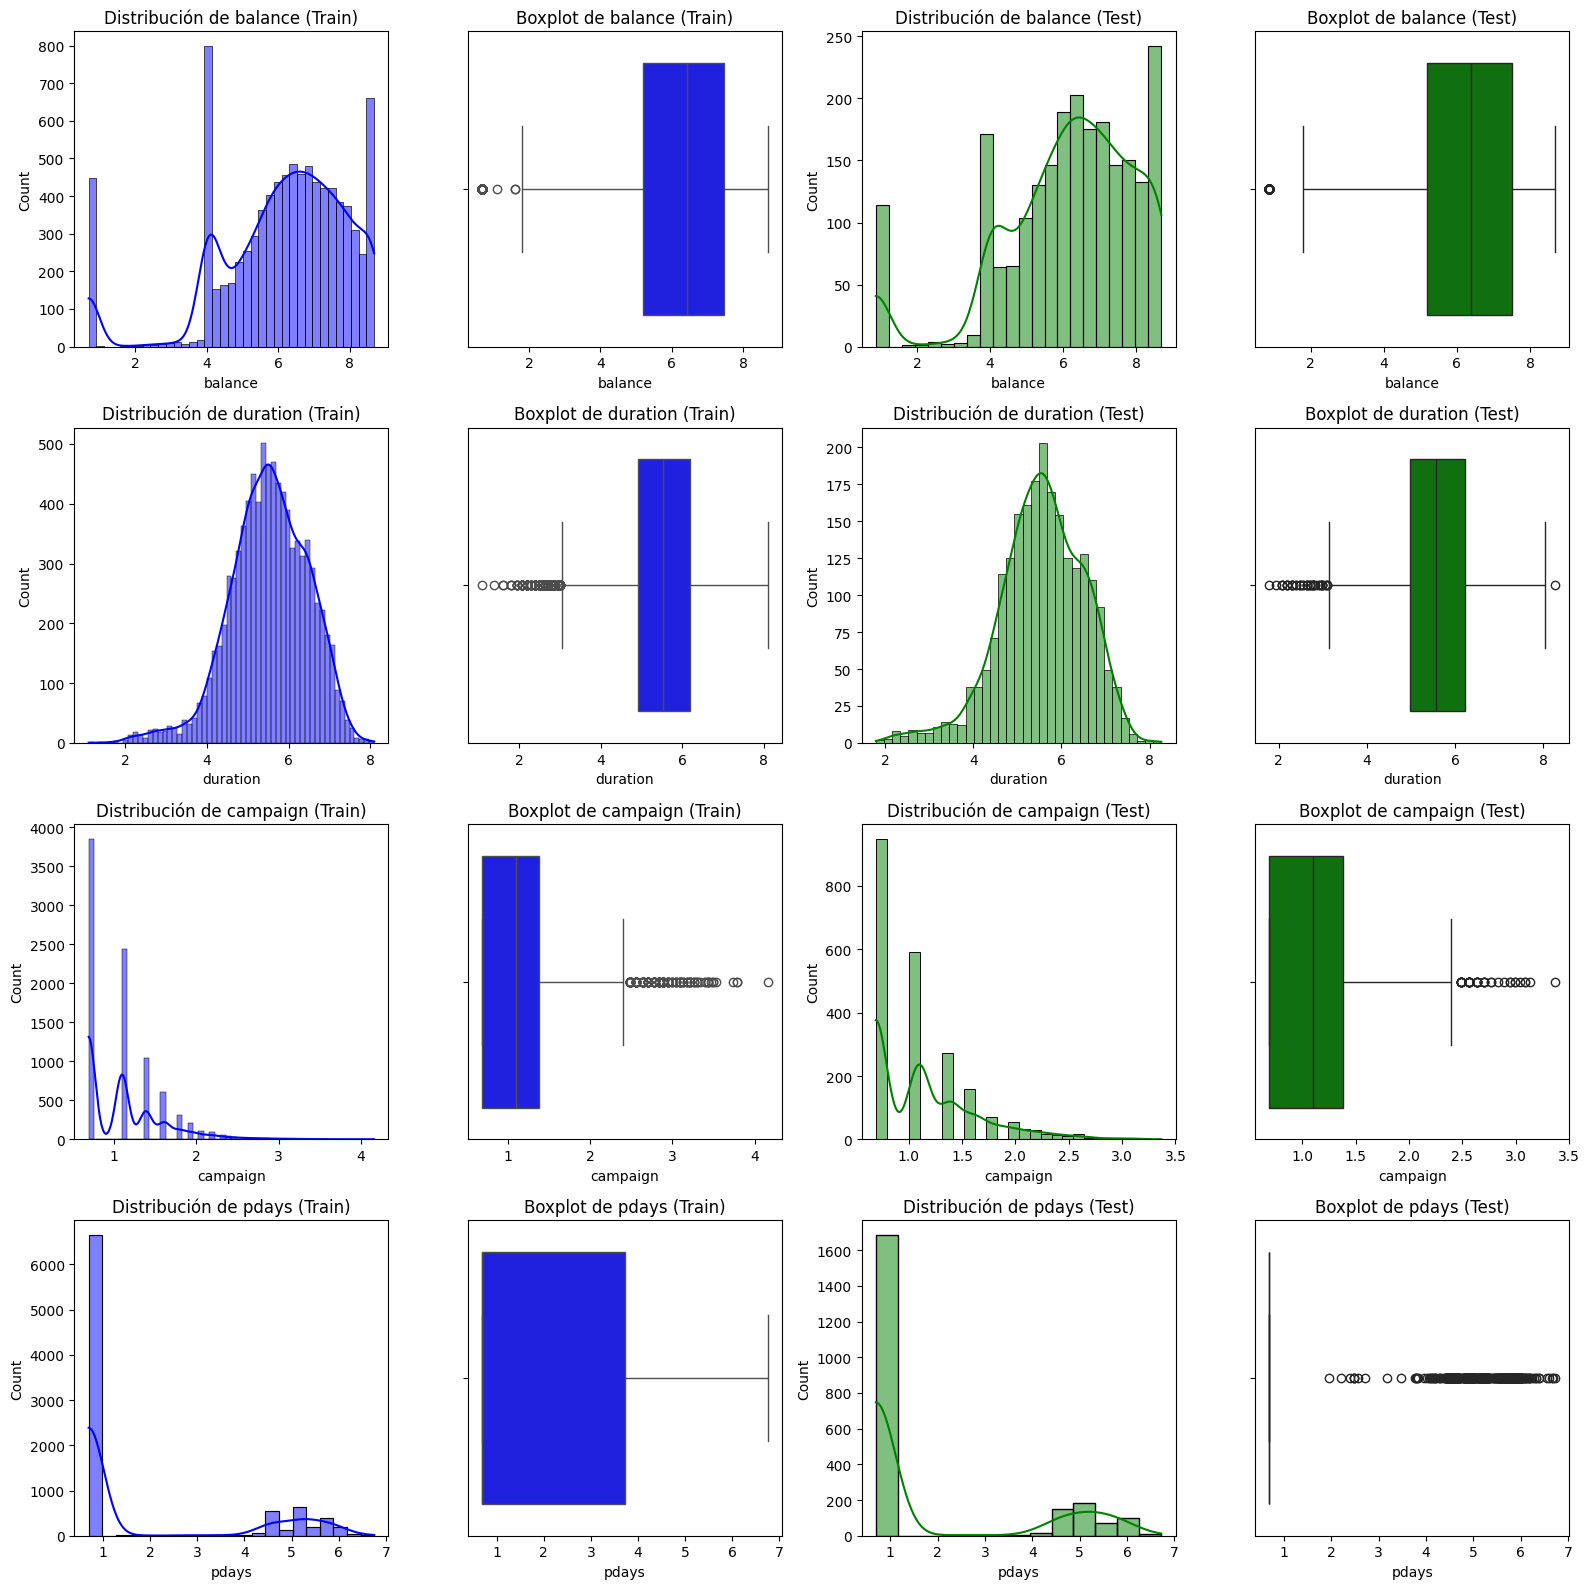

In [17]:
# --- Visualización de las distribuciones después de la transformación logarítmica para ambos conjuntos ---

# Crear subplots para histogramas y boxplots (entrenamiento y prueba)
fig, axes = plt.subplots(len(log_transformed_vars), 4, figsize=(16, len(log_transformed_vars) * 4))

for i, var in enumerate(log_transformed_vars):
    # Conjunto de entrenamiento - Histograma
    sns.histplot(X_train[var], kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Distribución de {var} (Train)')

    # Conjunto de entrenamiento - Boxplot
    sns.boxplot(x=X_train[var], ax=axes[i, 1], color='blue')
    axes[i, 1].set_title(f'Boxplot de {var} (Train)')

    # Conjunto de prueba - Histograma
    sns.histplot(X_test[var], kde=True, ax=axes[i, 2], color='green')
    axes[i, 2].set_title(f'Distribución de {var} (Test)')

    # Conjunto de prueba - Boxplot
    sns.boxplot(x=X_test[var], ax=axes[i, 3], color='green')
    axes[i, 3].set_title(f'Boxplot de {var} (Test)')

# Ajustar la visualización
plt.tight_layout()
plt.show()


Los gráficos muestran la distribución y la presencia de outliers después de la aplicación de la transformación logarítmica en las variables balance, duration, campaign, y pdays. A continuación, un análisis de los resultados:

* Balance:
La transformación logarítmica ha reducido parte del sesgo y mejorado la distribución, pero aún se observan algunos outliers en el extremo derecho.
La mayoría de los datos están concentrados en un rango moderado, con algunos valores más elevados que siguen destacándose como extremos.

* Duration:
La distribución de duration ahora es más simétrica tras la transformación logarítmica, lo que mejora su adecuación a los métodos de modelado.
Sin embargo, aún persisten algunos outliers, que pueden ser representativos de llamadas significativamente largas.

* Campaign:
A pesar de la transformación logarítmica, campaign sigue mostrando una concentración considerable en los valores más bajos, lo cual refleja el hecho de que la mayoría de los clientes son contactados pocas veces.
Los outliers permanecen en el extremo derecho, indicando clientes que fueron contactados muchas veces, lo que puede ser una información útil para el modelo.

* Pdays:
La transformación ha mejorado ligeramente la distribución de pdays, aunque sigue mostrando una estructura de múltiples picos debido a los días de contacto específico.
Los outliers en pdays se mantienen, pero la transformación ayuda a que la variable esté menos sesgada y sea más manejable.

# 8. Escalado de Variables Numéricas

Se escalaron las variables para ponerlas en una escala similar, lo cual es importante para evitar que el modelo dé más peso a variables con rangos mayores. Dado que muchas variables numéricas no seguían una distribución normal y contenían outliers, sé utilizó RobustScaler para estas, ya que es menos sensible a valores extremos. Para las variables sin outliers significativos, sé utilizó MinMaxScaler, que las normaliza entre 0 y 1, ayudando a mantener la homogeneidad en los datos sin alterar su distribución

In [18]:
# Variables con y sin outliers
outlier_features = ['balance', 'duration', 'pdays']
non_outlier_features = ['age', 'campaign', 'previous']

In [19]:
# Reemplazar valores infinitos resultantes de la transformación logarítmica
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Imputar valores nulos que resultaron de la transformación
X_train[outlier_features] = X_train[outlier_features].fillna(X_train[outlier_features].median())
X_test[outlier_features] = X_test[outlier_features].fillna(X_train[outlier_features].median())

In [20]:
# Escalar variables con outliers
robust_scaler = RobustScaler()
X_train[outlier_features] = robust_scaler.fit_transform(X_train[outlier_features])
X_test[outlier_features] = robust_scaler.transform(X_test[outlier_features])

In [21]:
# Escalar variables sin outliers en entrenamiento y prueba
minmax_scaler = MinMaxScaler()
X_train[non_outlier_features] = minmax_scaler.fit_transform(X_train[non_outlier_features])
X_test[non_outlier_features] = minmax_scaler.transform(X_test[non_outlier_features])

# 9. Codificación de Variables Categóricas

Basándonos en lo que se mencionó previamente:

* Ordinales (con jerarquía):
    - education: Transformar con Label Encoding (primary < secondary < tertiary).
    - month: Transformar en valores numéricos (jan = 1, ..., dec = 12).

* Nominales (sin jerarquía):
    - job, marital, default, housing, loan, contact, poutcome.

In [22]:
# Transformar variables ordinales
# Education
education_order = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
X_train['education'] = X_train['education'].map(education_order)
X_test['education'] = X_test['education'].map(education_order)

# Month
month_order = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
               'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
X_train['month'] = X_train['month'].map(month_order)
X_test['month'] = X_test['month'].map(month_order)

In [23]:
# Confirmar transformación de ordinales
print("\n# --- Transformación de variables ordinales --- #")
print("Conjunto de entrenamiento - Education:")
print(X_train['education'].value_counts())
print("\nConjunto de entrenamiento - Month:")
print(X_train['month'].value_counts())


# --- Transformación de variables ordinales --- #
Conjunto de entrenamiento - Education:
2    4355
3    2954
1    1201
0     419
Name: education, dtype: int64

Conjunto de entrenamiento - Month:
5     2281
7     1213
8     1208
6      973
11     759
4      752
2      610
10     320
1      266
9      242
3      214
12      91
Name: month, dtype: int64


In [24]:
print(X_train['education'].isnull().sum())
print(X_test['education'].isnull().sum())

0
0


Algunas variables nominales (job, contact, poutcome) tienen muchas categorías, estas variables contienen muchas categorías, algunas de ellas con muy pocos registros, lo que podría aumentar la dimensionalidad y dificultar el aprendizaje del modelo tras el One-Hot Encoding.

Se definió un umbral del 5% de frecuencia. Las categorías que aparecen en menos del 5% de los registros se agrupan en una categoría general llamada "Otros".

La ventaja sería reducción de dimensionalidad: Menos columnas tras el One-Hot Encoding y generalización mejorada.

In [25]:
# Variables nominales con muchas categorías a agrupar
nominal_vars_to_group = ['job', 'contact', 'poutcome']

# Definir el umbral de frecuencia (5% del total)
threshold = 0.05

# Función para agrupar categorías poco frecuentes en "Otros"
def group_low_frequency_categories(data, column, threshold):
    # Calcular frecuencias relativas
    freq = data[column].value_counts(normalize=True)
    # Categorías con frecuencias por debajo del umbral
    low_freq_categories = freq[freq < threshold].index
    # Reemplazar estas categorías con "Otros"
    data[column] = data[column].replace(low_freq_categories, 'Otros')
    return data

In [26]:
# Aplicar agrupación en entrenamiento y prueba
for var in nominal_vars_to_group:
    X_train = group_low_frequency_categories(X_train, var, threshold)
    X_test = group_low_frequency_categories(X_test, var, threshold)

# Verificar las frecuencias después de la agrupación
grouped_frequencies = {var: X_train[var].value_counts() for var in nominal_vars_to_group}

In [27]:
# Mostrar las frecuencias actualizadas
print("# --- Frecuencias después de la agrupación --- #")
for var, freq in grouped_frequencies.items():
    print(f"\n{var}:")
    print(freq)

# --- Frecuencias después de la agrupación --- #

job:
management     2078
blue-collar    1542
technician     1479
Otros          1422
admin.         1069
services        727
retired         612
Name: job, dtype: int64

contact:
cellular     6436
unknown      1876
telephone     617
Name: contact, dtype: int64

poutcome:
unknown    6643
failure     992
success     863
Otros       431
Name: poutcome, dtype: int64


Resultados de la agrupación de categorías
* job: Categorías menos frecuentes se agruparon bajo "Otros", con 1,422 registros. Las principales categorías, como management, blue-collar, y technician,  permanecen como estaban.
* contact: La categoría predominante es cellular (6,436 registros), seguida de unknown. Las demás menos frecuentes están agrupadas como "Otros".
* poutcome: unknown sigue siendo la categoría predominante con 6,643 registros.
Categorías como failure y success se mantienen, mientras que las menos frecuentes ahora están agrupadas en "Otros".

Se utilizó get_dummies para convertir las variables categóricas en valores numéricos a través de One-Hot Encoding, lo que permite al modelo interpretar estas categorías de forma efectiva sin imponer un orden artificial entre ellas.

In [28]:
 #Aplicar One-Hot Encoding en el conjunto de entrenamiento y prueba
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Alinear las columnas entre X_train y X_test para asegurarse de que tengan la misma estructura
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [29]:
# Verificar las primeras filas de ambos conjuntos
print("# --- Conjunto de Entrenamiento después de One-Hot Encoding y Alineación --- #")
print(X_train.head())

print("\n# --- Conjunto de Prueba después de One-Hot Encoding y Alineación --- #")
print(X_test.head())

# --- Conjunto de Entrenamiento después de One-Hot Encoding y Alineación --- #
           age  education   balance  day  month  duration  campaign     pdays  \
8644  0.363636          2 -0.019122   31      7 -0.006209  0.200000  0.000000   
2632  0.363636          3  0.637107    3      9  0.021352  0.000000  1.285105   
3056  0.090909          2 -0.497542   11      1 -0.176028  0.000000  1.274704   
1080  0.324675          2  0.745869   21     11  0.877136  0.200000  0.000000   
4006  0.246753          0 -0.350327   23      9  0.056656  0.116993  0.000000   

      previous  job_admin.  ...  marital_single  marital_unknown  default_yes  \
8644      0.00           1  ...               0                0            0   
2632      1.00           1  ...               0                0            0   
3056      0.25           0  ...               1                0            0   
1080      0.00           0  ...               0                0            0   
4006      0.00           0  .

In [30]:
# Verificar que el número de columnas sea igual en ambos conjuntos
print("\n# --- Número de columnas en X_train y X_test --- #")
print(f"X_train: {X_train.shape[1]} columnas")
print(f"X_test: {X_test.shape[1]} columnas")


# --- Número de columnas en X_train y X_test --- #
X_train: 26 columnas
X_test: 26 columnas


En el proceso de preprocesamiento de las variables categóricas, se decidió aplicar One-Hot Encoding con la eliminación de una columna de referencia (drop='first') para garantizar un dataset adecuado para el modelo de Regresión Logística.

**Razón detrás de la decisión**
* **Evitar multicolinealidad:** Cuando se aplica One-Hot Encoding, se genera una columna para cada categoría. Esto puede introducir multicolinealidad (correlación perfecta entre variables) porque la suma de las columnas binarias siempre es igual a 1.
La multicolinealidad puede afectar la capacidad del modelo para calcular coeficientes correctamente.

* **Facilitar la interpretación:** Al eliminar una columna de referencia, los coeficientes generados por el modelo se interpretan en relación con la categoría de referencia eliminada. Por ejemplo, para la variable marital (con categorías single, married, divorced), si divorced es la referencia, los coeficientes reflejan el efecto de ser single o married en comparación con divorced.

* **Reducción de dimensionalidad:** Al eliminar la columna de referencia, el número total de columnas del dataset disminuye, mejorando la eficiencia computacional sin pérdida de información.

# 10. Visualizaciones X_train y X_test

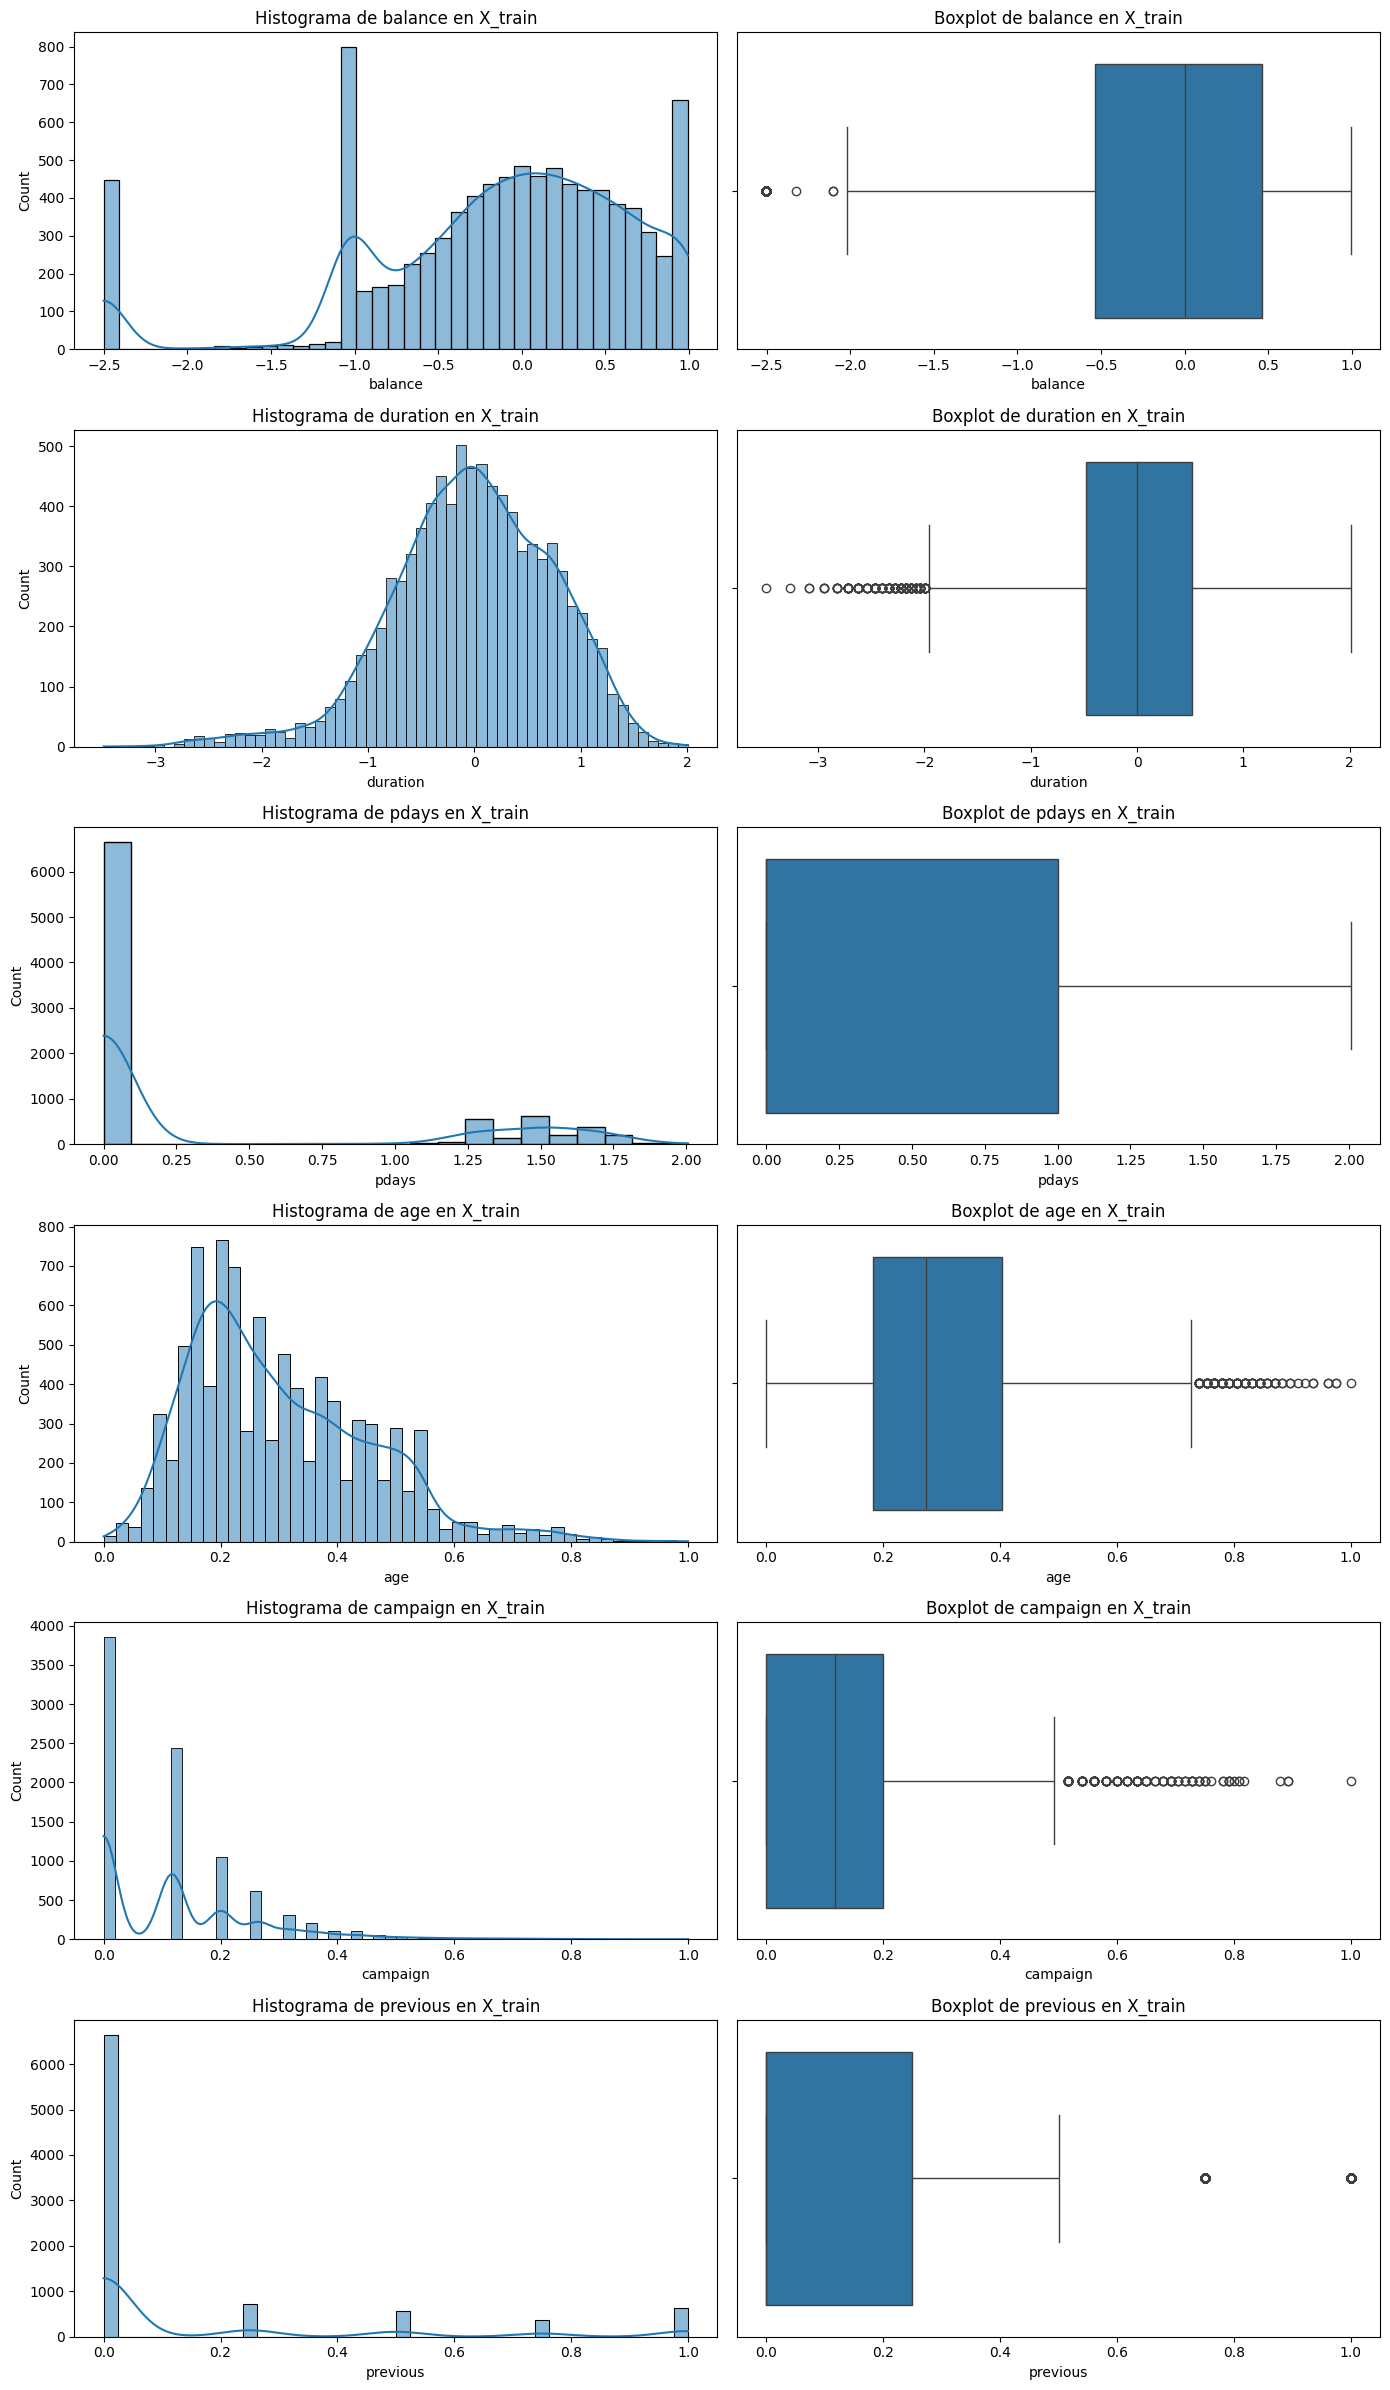

In [31]:
# Listas de variables numéricas
numerical_features = outlier_features + non_outlier_features

# Crear figura para histogramas y boxplots de X_train
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(14, 4 * len(numerical_features)))

for i, feature in enumerate(numerical_features):
    # Histograma para X_train
    sns.histplot(X_train[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {feature} en X_train')
    
    # Boxplot para X_train
    sns.boxplot(x=X_train[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {feature} en X_train')

plt.tight_layout()
plt.show()

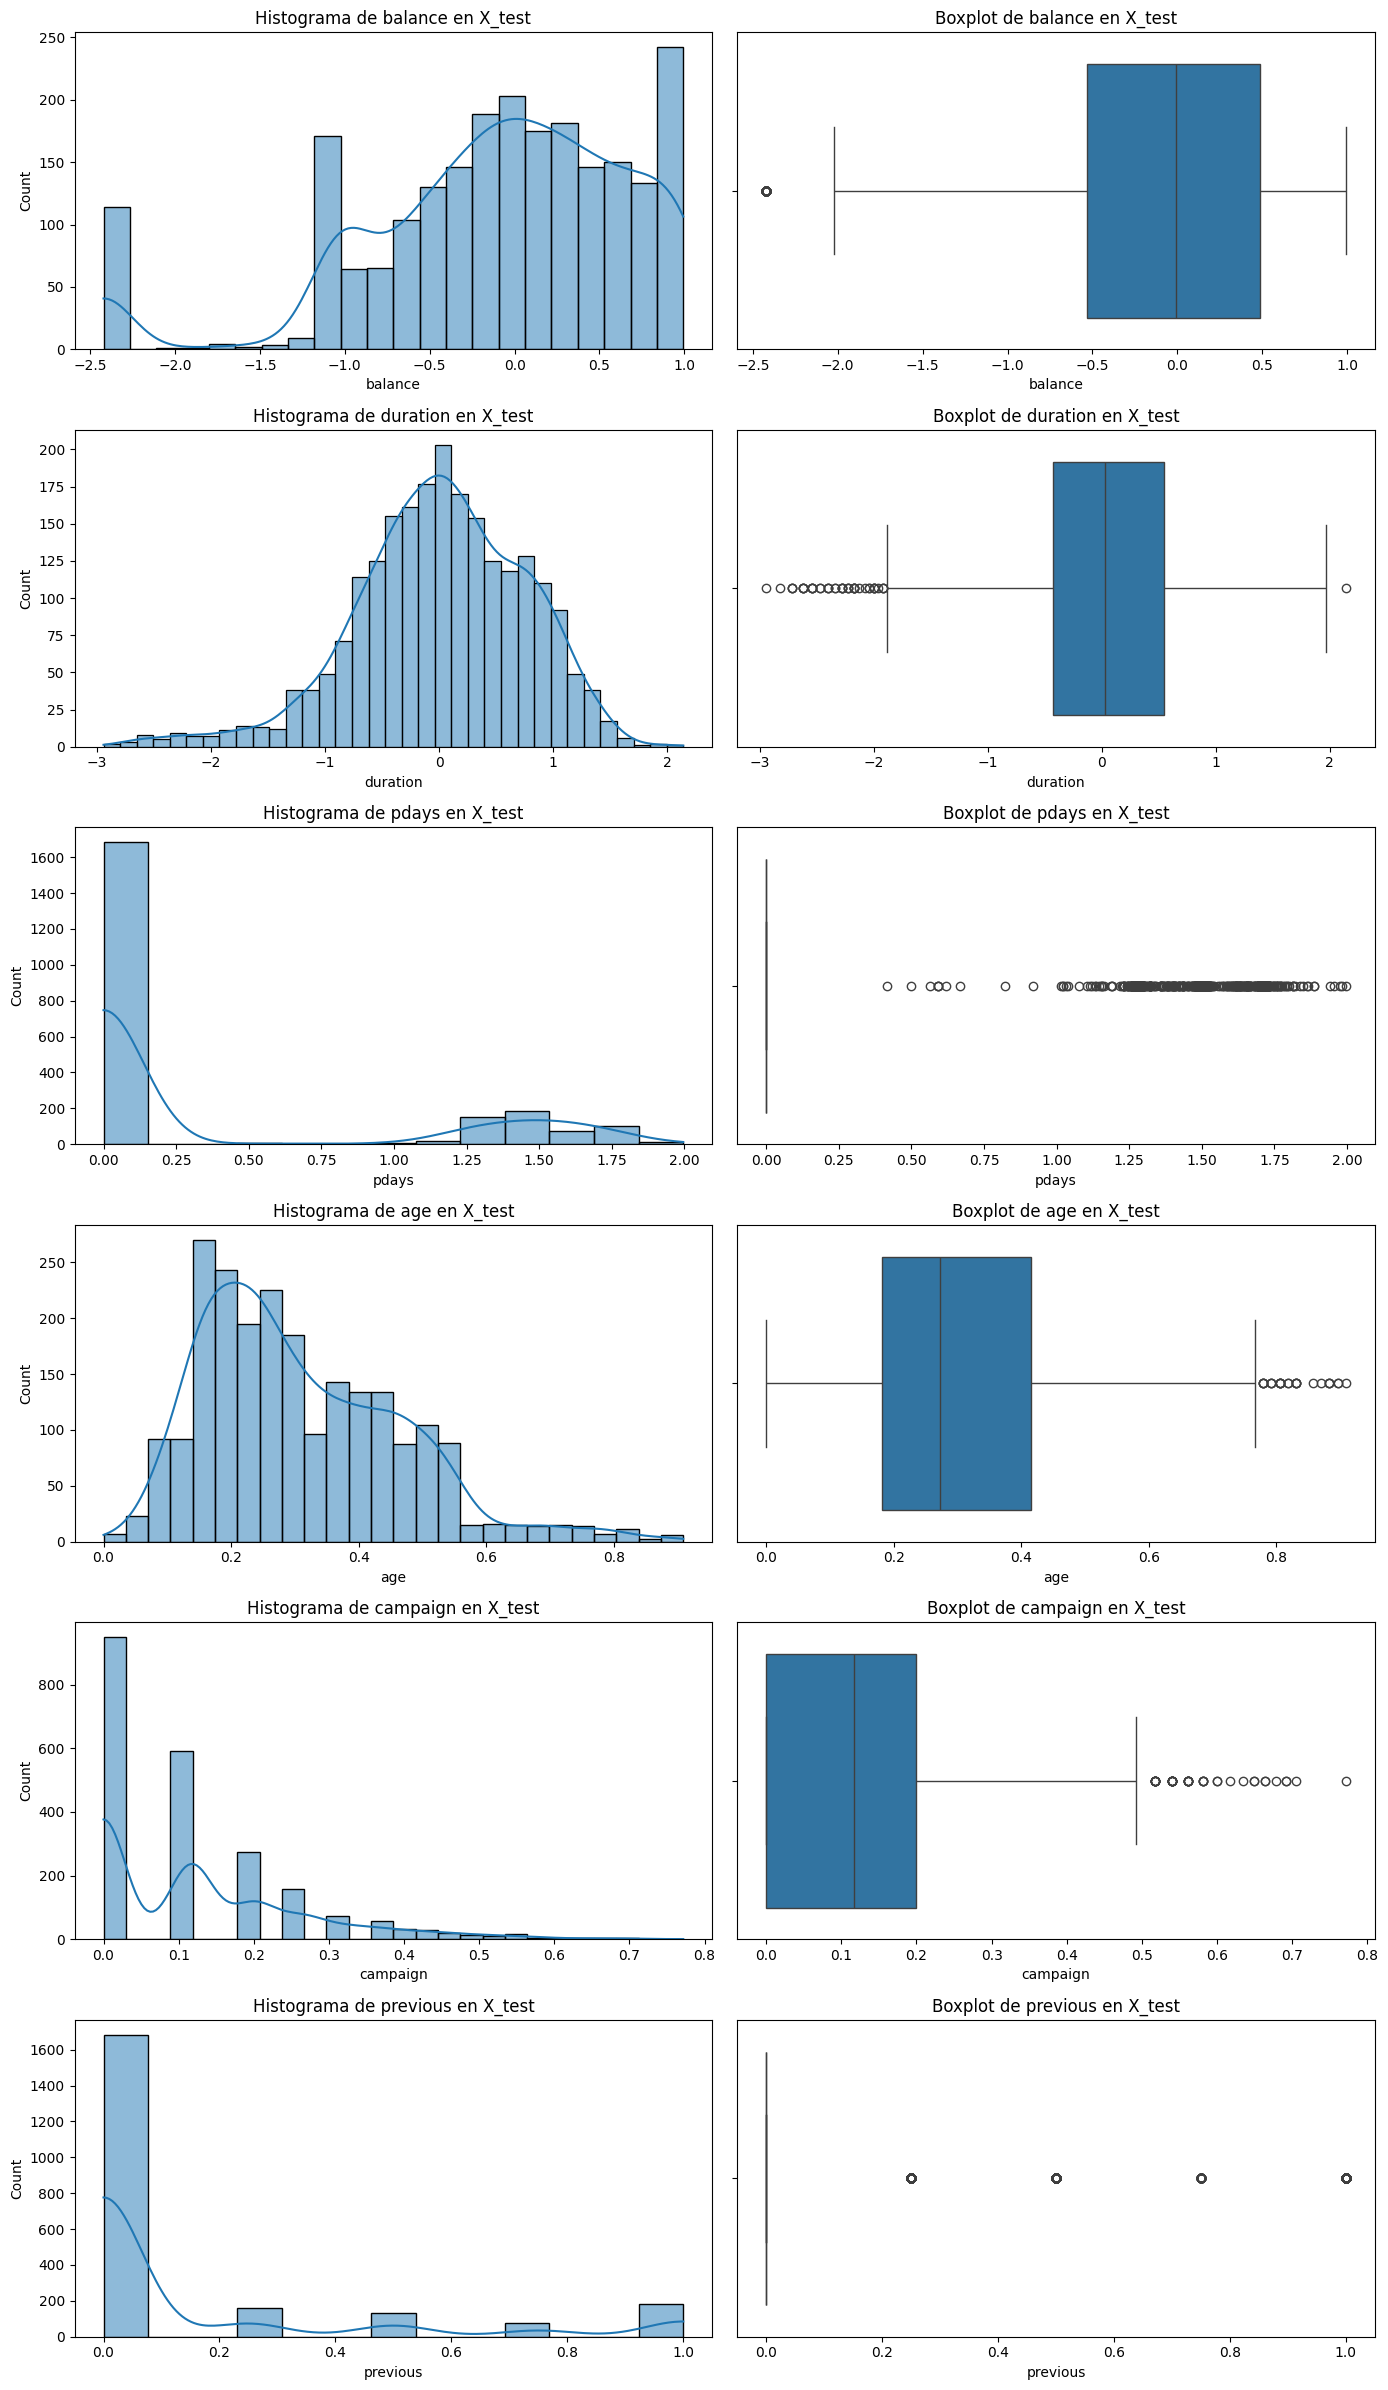

In [32]:
# Crear figura para histogramas y boxplots de X_test
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(14, 4 * len(numerical_features)))

for i, feature in enumerate(numerical_features):
    # Histograma para X_test
    sns.histplot(X_test[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {feature} en X_test')
    
    # Boxplot para X_test
    sns.boxplot(x=X_test[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {feature} en X_test')

plt.tight_layout()
plt.show()

# 11. Revisón final y Próximos pasos

In [33]:
#Validar que no hay valores NaN
print("Valores faltantes en X_train:")
print(X_train.isnull().sum().sum())

print("\nValores faltantes en X_test:")
print(X_test.isnull().sum().sum())

Valores faltantes en X_train:
0

Valores faltantes en X_test:
0


In [34]:
#Confirmar que las columnas están alineadas
print(f"Número de columnas en X_train: {X_train.shape[1]}")
print(f"Número de columnas en X_test: {X_test.shape[1]}")

print("\nColumnas diferentes entre X_train y X_test:")
print(set(X_train.columns) - set(X_test.columns))  # Debería ser vacío
print(set(X_test.columns) - set(X_train.columns))  # Debería ser vacío

Número de columnas en X_train: 26
Número de columnas en X_test: 26

Columnas diferentes entre X_train y X_test:
set()
set()


In [35]:
X_test.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 8220 to 903
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2233 non-null   float64
 1   education          2233 non-null   int64  
 2   balance            2233 non-null   float64
 3   day                2233 non-null   int64  
 4   month              2233 non-null   int64  
 5   duration           2233 non-null   float64
 6   campaign           2233 non-null   float64
 7   pdays              2233 non-null   float64
 8   previous           2233 non-null   float64
 9   job_admin.         2233 non-null   uint8  
 10  job_blue-collar    2233 non-null   uint8  
 11  job_management     2233 non-null   uint8  
 12  job_retired        2233 non-null   uint8  
 13  job_services       2233 non-null   uint8  
 14  job_technician     2233 non-null   uint8  
 15  marital_married    2233 non-null   uint8  
 16  marital_single     223

In [36]:
#Revisar escalado y distribución
print("Estadísticas descriptivas de X_train:")
print(X_train.describe())

print("\nEstadísticas descriptivas de X_test:")
print(X_test.describe())

Estadísticas descriptivas de X_train:
               age    education      balance          day        month  \
count  8929.000000  8929.000000  8929.000000  8929.000000  8929.000000   
mean      0.300124     2.102475    -0.123607    15.683503     6.199238   
std       0.154186     0.801631     0.812370     8.429058     2.567733   
min       0.000000     0.000000    -2.501338     1.000000     1.000000   
25%       0.181818     2.000000    -0.537451     8.000000     5.000000   
50%       0.272727     2.000000     0.000000    15.000000     6.000000   
75%       0.402597     3.000000     0.462549    22.000000     8.000000   
max       1.000000     3.000000     0.993917    31.000000    12.000000   

          duration     campaign        pdays     previous   job_admin.  ...  \
count  8929.000000  8929.000000  8929.000000  8929.000000  8929.000000  ...   
mean     -0.017318     0.118925     0.377859     0.153517     0.119722  ...   
std       0.750607     0.138566     0.654193     0.302391 

In [37]:
#Confirmar la variable objetivo y Revisar balance de clases
print("Distribución de y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribución de y_test:")
print(y_test.value_counts(normalize=True))

Distribución de y_train:
0    0.526151
1    0.473849
Name: deposit, dtype: float64

Distribución de y_test:
0    0.526198
1    0.473802
Name: deposit, dtype: float64


In [38]:
# tamaño y las dimensiones finales:
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (8929, 26)
Tamaño de X_test: (2233, 26)
Tamaño de y_train: (8929,)
Tamaño de y_test: (2233,)


**Recomendaciones para los próximos pasos**
El conjunto de datos preprocesado está listo para entrenar y evaluar un modelo de Regresión Logística, aprovechando todas las variables transformadas. Este modelo permitirá analizar cómo las características influyen en la probabilidad de suscripción a depósitos a plazo.

**Pasos clave:**
* **Entrenamiento:** Entrenar una Regresión Logística para garantizar la interpretabilidad de los resultados.

* **Evaluación:** Utilizar métricas como AUC-ROC, precisión, recall, f1-score y generar una matriz de confusión para evaluar el desempeño del modelo en la clasificación de ambas clases.

* **Interpretación:** Analizar los coeficientes del modelo para identificar las variables más influyentes en la decisión de los clientes.

* **Comparación:** Evaluar si las métricas sugieren un buen balance entre las clases o si es necesario ajustar el modelo o aplicar técnicas de balanceo.